In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## I- Importation des données

In [2]:
random = pd.read_csv("../Data/student_all_community_randomweights.csv")
xgb = pd.read_csv("../Data/student_all_community_xgbweights.csv")
data = pd.read_csv("../Data/student_all.csv")

---

## II- Statistiques descriptives 

In [3]:
print(f"Random optimized weights: {random.shape}")
print(f"XGBosst optimized weights: {xgb.shape}")
print(f"XGBosst optimized weights: {data.shape}")

Random optimized weights: (1046, 37)
XGBosst optimized weights: (1046, 37)
XGBosst optimized weights: (1046, 35)


On récupère la liste des variables numériques et non-numériques

In [4]:
random_numeric_cols = random.select_dtypes(include=[np.number]).columns.tolist()
random_non_numeric_cols = random.select_dtypes(exclude=[np.number]).columns.tolist()
xgb_numeric_cols = xgb.select_dtypes(include=[np.number]).columns.tolist()
xgb_non_numeric_cols = xgb.select_dtypes(exclude=[np.number]).columns.tolist()

Bref aperçu des données : 

In [5]:
random.head(3)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Name,Community
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,mat,2,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,mat,2,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,mat,5,2,0


In [6]:
xgb.head(3)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Name,Community
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,mat,2,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,mat,2,1,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,mat,5,2,1


In [7]:
data.drop(columns="Unnamed: 0").head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mat


L'apparition d'une colonne *Unnamed: 0* vient de l'export des données d'un DataFrame à un CSV avec l'argument *index* prenant la valeur *True*.

### A- Statistiques sur la variable "reason"

Nombre de valeurs uniques

In [8]:
data['reason'].nunique()

4

Fréquence des valeurs : 

In [9]:
data['reason'].value_counts()

course        431
home          258
reputation    248
other         109
Name: reason, dtype: int64

Répartition :

In [10]:
data['reason'].value_counts(normalize=True)

course        0.412046
home          0.246654
reputation    0.237094
other         0.104207
Name: reason, dtype: float64

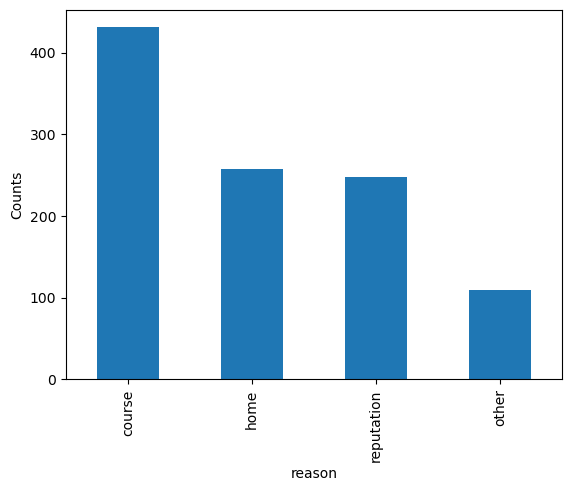

In [11]:
data['reason'].value_counts().plot(kind='bar')
plt.xlabel('reason')
plt.ylabel('Counts')
plt.show()

### B- Statisiques sur les variables Walc et Dalc

Distribution de la variable

In [12]:
print(f"Mean: {round(data['Walc'].mean(), 4)}")

Mean: 2.2868


In [13]:
print(f"Standard-Error: {round(data['Walc'].std(), 4)}")

Standard-Error: 1.2852


In [14]:
print(f"Min: {data['Walc'].min()}")

Min: 1


In [15]:
print(f"Max: {data['Walc'].max()}")

Max: 5


In [16]:
data['Walc'].quantile([0.25, 0.5, 0.75])

0.25    1.0
0.50    2.0
0.75    3.0
Name: Walc, dtype: float64

In [17]:
data['Walc'].count()

1046

In [18]:
data['Walc'].isna().sum()

0

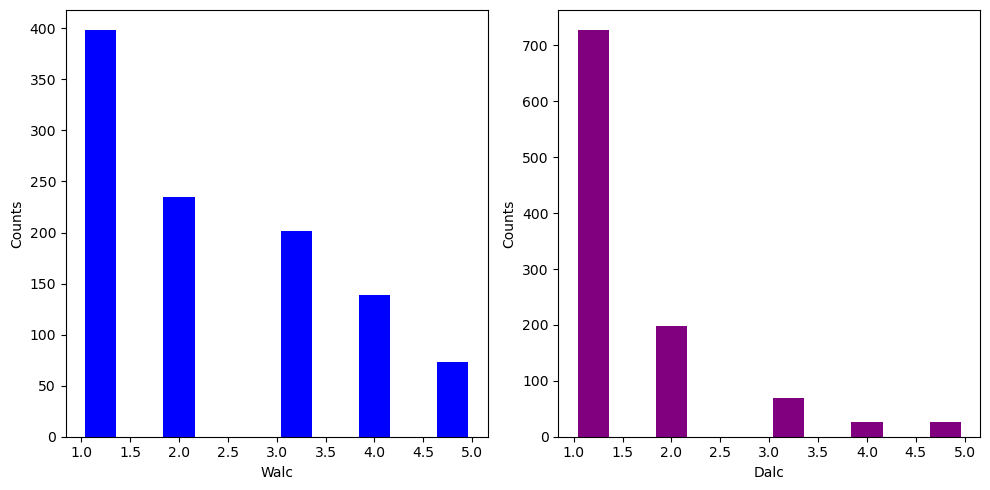

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

data['Walc'].plot(kind='hist', bins=10, rwidth=0.8, color='blue', ax=ax[0])
ax[0].set_xlabel('Walc')
ax[0].set_ylabel('Counts')

data['Dalc'].plot(kind='hist', bins=10, rwidth=0.8, color='purple', ax=ax[1])
ax[1].set_xlabel('Dalc')
ax[1].set_ylabel('Counts')

plt.tight_layout()
plt.show()

### C- Variable "romantic"

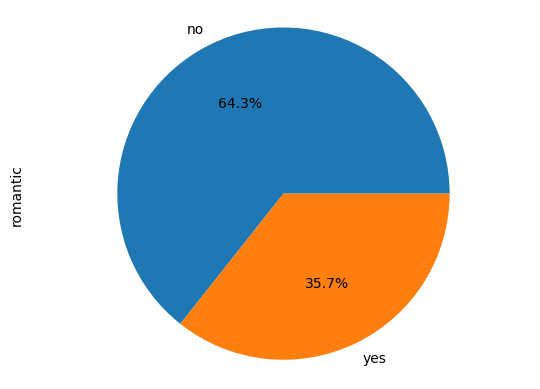

In [20]:
data['romantic'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

---

## II- Statistiques sur les communautés

### A- Proportions des communautés

In [21]:
random_proportions = random['Community'].value_counts(normalize=True).to_frame()
random_proportions.rename({"Community": "Proportion"}, inplace=True, axis=1)

In [22]:
random_proportions

,Proportion
9,0.069790
1,0.067878
16,0.063098
5,0.060229
11,0.059273
0,0.056405
17,0.055449
2,0.054493
7,0.054493
14,0.051625


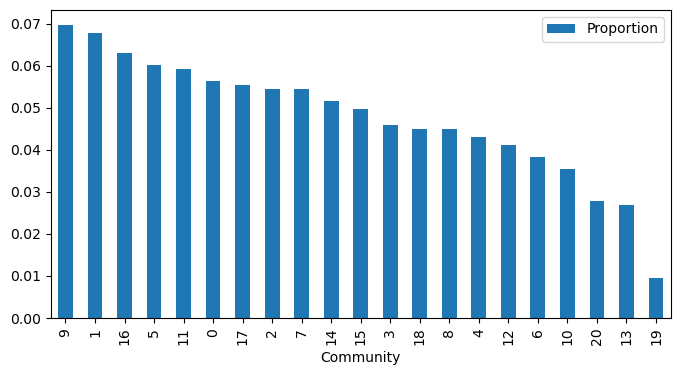

In [23]:
random_proportions.plot(kind="bar", figsize=(8, 4))
plt.xlabel('Community')
plt.show()

In [24]:
xgb_proportions = xgb['Community'].value_counts(normalize=True).to_frame()
xgb_proportions.rename({"Community": "Proportion"}, inplace=True, axis=1)

In [25]:
xgb_proportions

,Proportion
1,0.334608
0,0.260994
2,0.217973
3,0.186424


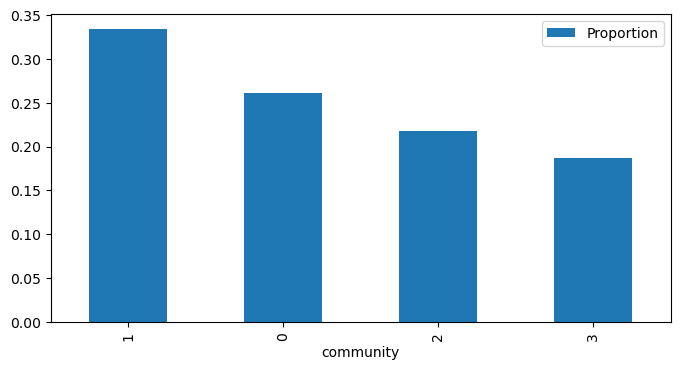

In [26]:
xgb_proportions.plot(kind="bar", figsize=(8, 4))
plt.xlabel('community')
plt.show()

### B- Médiane de chaque variable numérique pour chacune des communautés

In [27]:
random_grouped_df = random.drop(columns=random_non_numeric_cols).groupby('Community')
random_stats = random_grouped_df.agg(['median']).round(2)
random_stats.columns = random_stats.columns.droplevel(1)

In [28]:
xgb_grouped_df = xgb.drop(columns=xgb_non_numeric_cols).groupby('Community')
xgb_stats = xgb_grouped_df.agg(['median']).round(2)
xgb_stats.columns = xgb_stats.columns.droplevel(1)

In [29]:
random_stats.sort_values("alc", ascending=False)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc,Name
Community,,,,,,,,,,,,,,,,,,
13,16.5,2.0,2.0,2.0,1.0,1.0,4.0,3.0,3.5,1.0,3.5,4.0,2.0,9.0,9.0,10.0,5.0,547.5
20,16.0,2.0,2.0,2.0,1.0,0.0,4.0,3.0,3.0,1.0,3.0,4.0,1.0,10.0,10.0,10.0,4.0,952.0
3,17.0,3.0,2.0,1.0,3.0,0.0,4.0,3.0,3.0,1.5,2.0,4.0,2.0,11.0,12.0,12.5,4.0,766.5
17,18.0,3.0,2.0,2.0,2.0,0.0,4.0,3.0,3.0,1.0,3.0,4.0,2.0,10.0,10.0,10.0,4.0,925.5
8,17.0,2.0,2.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0,3.0,4.0,4.0,11.0,11.0,11.0,4.0,660.0
9,15.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,11.0,11.0,11.0,4.0,82.0
1,17.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,3.0,3.0,5.0,11.0,12.0,12.0,4.0,597.0
19,15.5,3.0,1.0,2.0,2.0,0.0,5.0,3.5,4.0,1.0,2.0,4.0,4.0,8.5,10.0,10.0,3.0,838.5
18,17.0,2.0,2.0,2.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,1.0,10.0,10.0,11.0,3.0,944.0


In [30]:
xgb_stats.sort_values("alc", ascending=False)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc,Name
Community,,,,,,,,,,,,,,,,,,
0,17.0,2.0,2.0,2.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,10.0,10.0,10.0,3.0,909.0
1,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,4.0,11.0,11.0,11.0,3.0,174.5
2,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,12.0,12.0,12.0,3.0,613.5
3,17.0,3.0,2.0,1.0,2.0,0.0,4.0,4.0,3.0,1.0,2.0,4.0,2.0,12.0,12.0,13.0,3.0,590.0


### C- Moyenne de chaque variable numérique pour chacune des communautés

In [31]:
random_grouped_df = random.drop(columns=random_non_numeric_cols).groupby('Community')
random_stats = random_grouped_df.agg(['mean']).round(2)
random_stats.columns = random_stats.columns.droplevel(1)

In [32]:
xgb_grouped_df = xgb.drop(columns=xgb_non_numeric_cols).groupby('Community')
xgb_stats = xgb_grouped_df.agg(['mean']).round(2)
xgb_stats.columns = xgb_stats.columns.droplevel(1)

In [33]:
random_stats.sort_values("alc", ascending=False)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc,Name
Community,,,,,,,,,,,,,,,,,,
19,15.70,2.60,2.00,2.00,1.90,0.00,4.50,3.30,3.90,1.90,2.70,3.70,3.70,9.90,10.30,10.40,4.60,838.50
13,16.43,1.93,2.07,1.96,1.39,1.07,4.04,3.25,3.25,1.57,2.96,3.64,4.14,9.71,9.11,9.18,4.54,397.57
17,17.69,2.74,2.40,1.76,1.74,0.36,4.10,3.00,3.12,1.83,2.66,3.50,3.33,9.86,10.38,9.76,4.48,793.45
3,17.58,2.54,2.50,1.42,2.48,0.08,4.02,3.35,3.62,1.73,2.48,3.62,3.27,11.92,11.79,11.67,4.21,590.67
20,16.59,2.07,1.76,1.76,1.45,0.59,4.07,3.48,3.38,1.62,2.52,3.72,2.17,10.00,9.86,10.14,4.14,918.72
8,17.21,2.43,2.04,1.62,1.64,0.36,4.02,3.23,3.32,1.49,2.62,3.89,4.77,10.45,10.60,10.53,4.11,508.34
9,15.52,3.07,2.32,1.38,2.30,0.16,3.84,3.25,3.15,1.68,2.42,3.66,3.96,11.53,11.44,11.63,4.11,258.19
1,17.00,2.52,2.55,1.24,1.77,0.14,3.94,2.87,3.07,1.51,2.61,3.30,7.18,11.44,12.23,12.69,4.11,521.68
12,17.00,2.67,2.42,1.37,2.02,0.37,3.70,3.28,3.37,1.51,2.56,3.40,7.56,9.98,10.23,10.56,4.07,514.91


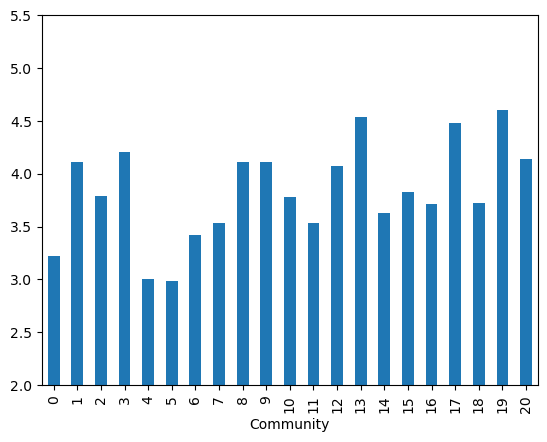

In [48]:
random_stats["alc"].plot(kind="bar", ylim=(2, 5.5))
plt.ylabel("Alc score")
plt.show()

In [42]:
xgb_stats.sort_values("alc", ascending=False)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc,Name
Community,,,,,,,,,,,,,,,,,,
0,17.12,2.16,2.05,1.85,1.78,0.35,3.89,3.23,3.23,1.59,2.34,3.41,2.83,10.38,10.47,10.53,3.93,839.27
3,16.72,2.78,2.57,1.47,1.94,0.22,3.87,3.27,3.27,1.50,2.31,3.48,4.36,12.03,12.10,12.56,3.81,608.69
1,16.53,2.80,2.55,1.39,2.06,0.32,3.95,3.23,3.12,1.45,2.27,3.58,5.98,10.94,10.79,10.50,3.72,174.50
2,16.62,2.68,2.39,1.39,2.08,0.14,4.02,3.06,3.04,1.44,2.23,3.70,4.09,11.95,12.18,12.59,3.68,603.70


### D- Mode des variables non-numériques

In [35]:
def get_mode(x):
    return x.value_counts().index[0]

In [36]:
grouped_df = random.groupby('Community')
random_mode_df = grouped_df[random_non_numeric_cols].agg(get_mode).round(2)
# random_stats_2 = random_stats.join(mode_df)

In [37]:
random_mode_df

,school,gender,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,course
Community,,,,,,,,,,,,,,,,,,
0,GP,M,U,GT3,T,other,other,home,parent,no,yes,no,no,yes,yes,yes,no,por
1,GP,F,U,GT3,T,other,other,reputation,parent,no,yes,no,yes,yes,yes,yes,no,por
2,GP,F,U,GT3,T,other,other,course,parent,no,yes,no,no,yes,yes,yes,yes,por
3,GP,F,U,GT3,T,other,other,course,parent,no,yes,no,no,yes,yes,yes,no,por
4,GP,M,U,GT3,T,other,other,course,parent,no,no,no,yes,yes,yes,yes,no,por
5,GP,M,U,GT3,T,services,other,home,parent,no,yes,no,yes,yes,yes,yes,no,por
6,GP,F,U,GT3,T,other,other,home,parent,no,yes,no,yes,yes,yes,yes,no,por
7,GP,F,U,GT3,T,other,other,reputation,parent,no,yes,no,yes,yes,yes,yes,no,por
8,GP,M,U,GT3,T,other,other,course,parent,no,no,no,no,yes,yes,yes,no,por


In [38]:
grouped_df = xgb.groupby('Community')
xgb_mode_df = grouped_df[xgb_non_numeric_cols].agg(get_mode).round(2)

In [39]:
xgb_mode_df

,school,gender,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,course
Community,,,,,,,,,,,,,,,,,,
0,MS,F,R,GT3,T,other,other,course,parent,no,yes,no,no,yes,yes,yes,no,por
1,GP,F,U,GT3,T,other,other,course,parent,no,yes,no,yes,yes,yes,yes,no,mat
2,GP,F,U,GT3,T,other,other,course,parent,no,yes,no,yes,yes,yes,yes,no,por
3,GP,F,U,GT3,T,other,other,course,parent,no,yes,no,yes,yes,yes,yes,no,por
